# **Support Vector Machine (SVM)**

### Máquinas de vectores de soporte - Clasificación/Regresión  


_Minería de datos_

---

## **Introducción**

A continuación veremos cómo los modelos lineales pueden no sólo realizar tareas de [regresión](https://iartificial.net/clasificacion-o-regresion/), sino también de clasificación. En esta labor utilizaremos la misma forma lineal de regresión, pero ahora en vez de predecir una variable continua (ej: sueldo, valor de una casa) buscaremos obtener un resultado binario para que nuestro algoritmo realice la clasificación.

A pesar de que en su origen se desarrolló como un método de clasificación binaria, su aplicación se ha extendido a problemas de clasificación múltiple y regresión. SVMs ha resultado ser uno de los mejores clasificadores para un amplio abanico de situaciones, por lo que se considera uno de los referentes dentro del ámbito de aprendizaje estadístico y machine learning.


## **¿Qué es?**  

El algoritmo de _Máquinas de vectores de soporte_ pertenece a la familia de algoritmos que utilizan aprendizaje supervisado para realizar sus predicciones. Es utilizado en tareas de clasificación como de regresión, pero en nuestro caso nos enfocaremos en cómo un modelo lineal es capaz de realizar una clasificación. 

**Este algoritmo se basa en los datos de entrenamiento _etiquetados_ para generar un _hiperplano_ que clasifica los nuevos ejemplos en dos espacios dimensionales**. El _hiperplano_ es la línea que divide al plano en dos partes, quedando cada clase a un lado.

<br>

![img](https://drive.google.com/uc?id=1bF7OTMNB3G7_q1rCBcu5iO_aDVqchKef)


Como vemos en la imagen superior izquierda existen muchos hiperplanos posibles para dividir el plano y posteriormente el algoritmo haga la predicción (ej: 'cuadrado' , 'circulo'). Sin embargo, como nuestro trabajo científico requiere de precisión exacta y medible, el objetivo será encontrar el hiperplano (linea) óptimo para cada plano/dataset y así nuestro modelo obtenga resultados cuantificables (imagen derecha). Este _hiperplano óptimo_ siempre buscará tener el máximo de margen posible, el cual se traduce en la distancia máxima entre los puntos de datos que representan a cada clase ('cuadrado', 'circulo'). Mientras más grande sea el margen, mayor precisión tendrá nuestro algoritmo en tareas de clasificación.

## **Aplicación**


![img](https://drive.google.com/uc?id=1Z5QNAoJW_hpP8X1bFKmbezzyWhZNJ1ne)

A continuación, con la ayuda de [scikit-learn](https://scikit-learn.org/stable/) implementaremos un algoritmo de tipo _máquina de vectores de soporte_ cuyo **objetivo** será **clasificar tipos de tumor mamario en benigno y maligno**.

---

"El cáncer de mama es el cáncer más común entre las mujeres del mundo. Representa el 25% de todos los casos de cáncer y afectó a más de 2.1 millones de personas solo en 2015. Aparece cuando las células del seno comienzan a crecer sin control. Estas células generalmente forman tumores que pueden verse a través de rayos X o sentirse como bultos en el área del seno.

El diagnóstico temprano aumenta significativamente las posibilidades de supervivencia. Los desafíos clave contra su detección es cómo clasificar los tumores en malignos (cancerosos) o benignos (no cancerosos). Un tumor se considera maligno si las células pueden crecer en los tejidos circundantes o extenderse a áreas distantes del cuerpo. Un tumor benigno no invade el tejido cercano ni se propaga a otras partes del cuerpo como los tumores cancerosos, pero puede ser grave si presiona estructuras vitales como los vasos sanguíneos o los nervios.

La técnica de Machine Learning puede mejorar dramáticamente el nivel de diagnóstico en cáncer de seno. La investigación muestra que los médicos experimentados pueden detectar el cáncer con una precisión del 79%, mientras que se puede lograr una precisión del 91% (a veces hasta el 97%) utilizando técnicas de Machine Learning." (Adebola Lamidi)

---

#### **Dataset**

El set de datos que trabajaremos en esta ocasión se calcula a partir de una imagen digitalizada de un [aspirado con aguja fina](https://www.cancer.org/es/cancer/cancer-de-seno/pruebas-de-deteccion-y-deteccion-temprana-del-cancer-de-seno/biopsia-del-seno/biopsia-del-seno-por-aspiracion-con-aguja-fina.html) (FNA) de una masa mamaria. Estos datos describen las características de los núcleos celulares presentes en la imagen. 

El conjunto de datos contiene 30 características/atributos y como **variable target (objetivo) a clasificar, el tipo de cáncer**. Los tipos de cáncer se dividen en dos clases: maligno (dañino) y benigno (no dañino).






# Importación y carga de datos

In [ ]:
# Importamos dataset de ejemplo incluido en librería scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC # importación de modelo

# cargamos dataset
cancer = datasets.load_breast_cancer()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploración y análisis de datos


In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
# obtenemos las características del dataset
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# obtenemos variable target, la cual servirá para clasfificar
# el tipo de cancer('malignant' 'benign')
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# creamos dataframe
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# agregamos columna target no incluida
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# verificamos si dataset contiene valores nulos
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
# cantidad de muestras benignas(1) y malignas(0) 
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

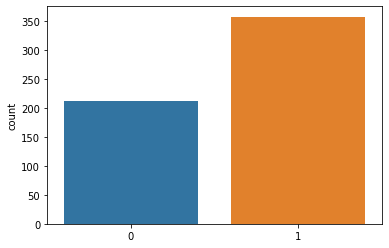

In [ ]:
# grafica cantidad de muestras malignas (azul: 0) y benignas (naranjo: 1)
sns.countplot(cancer['target'])

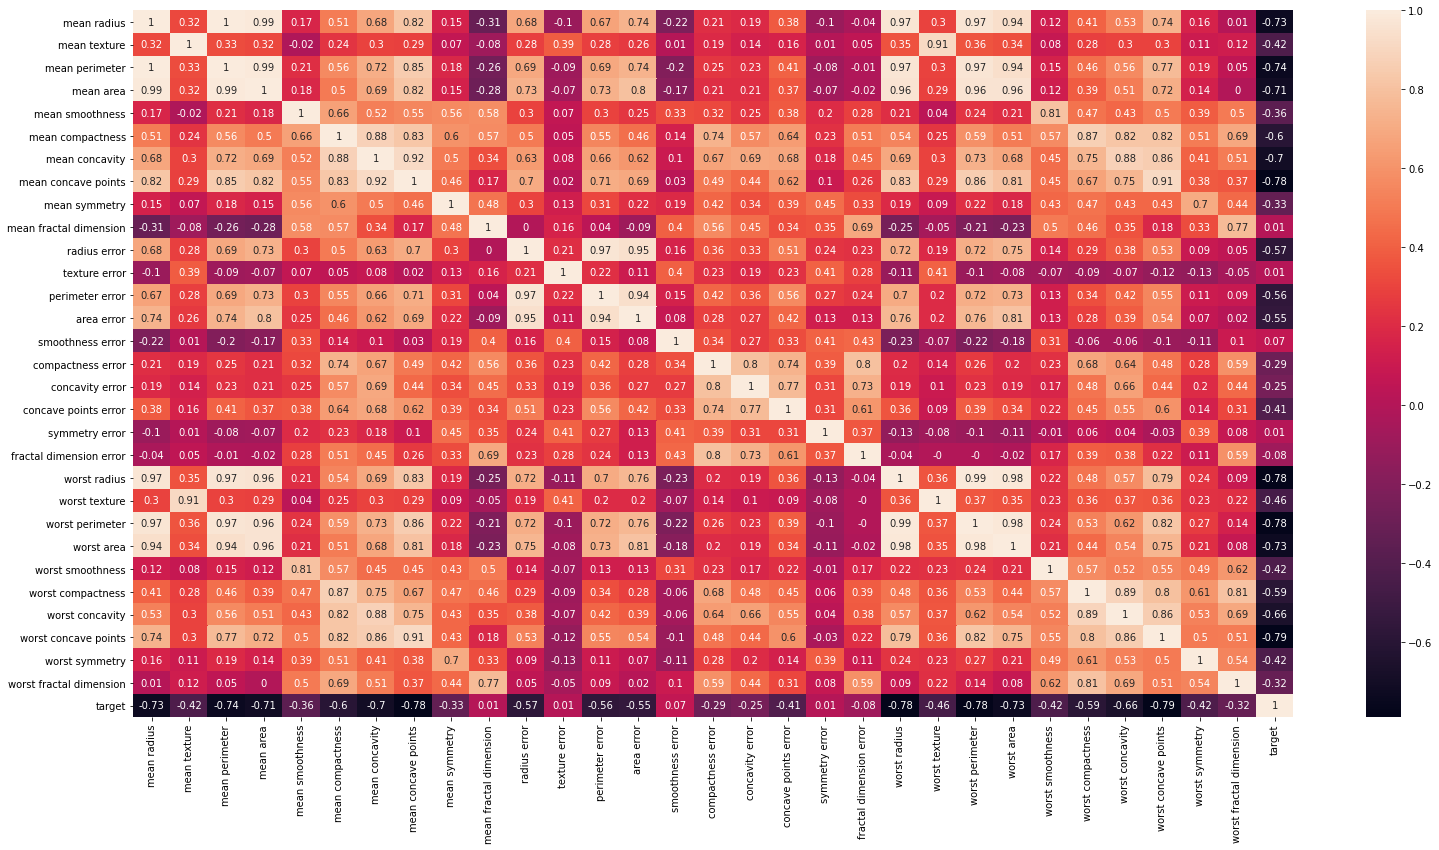

In [ ]:
# creamos matriz de correlación
plt.figure(figsize = (26,13))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

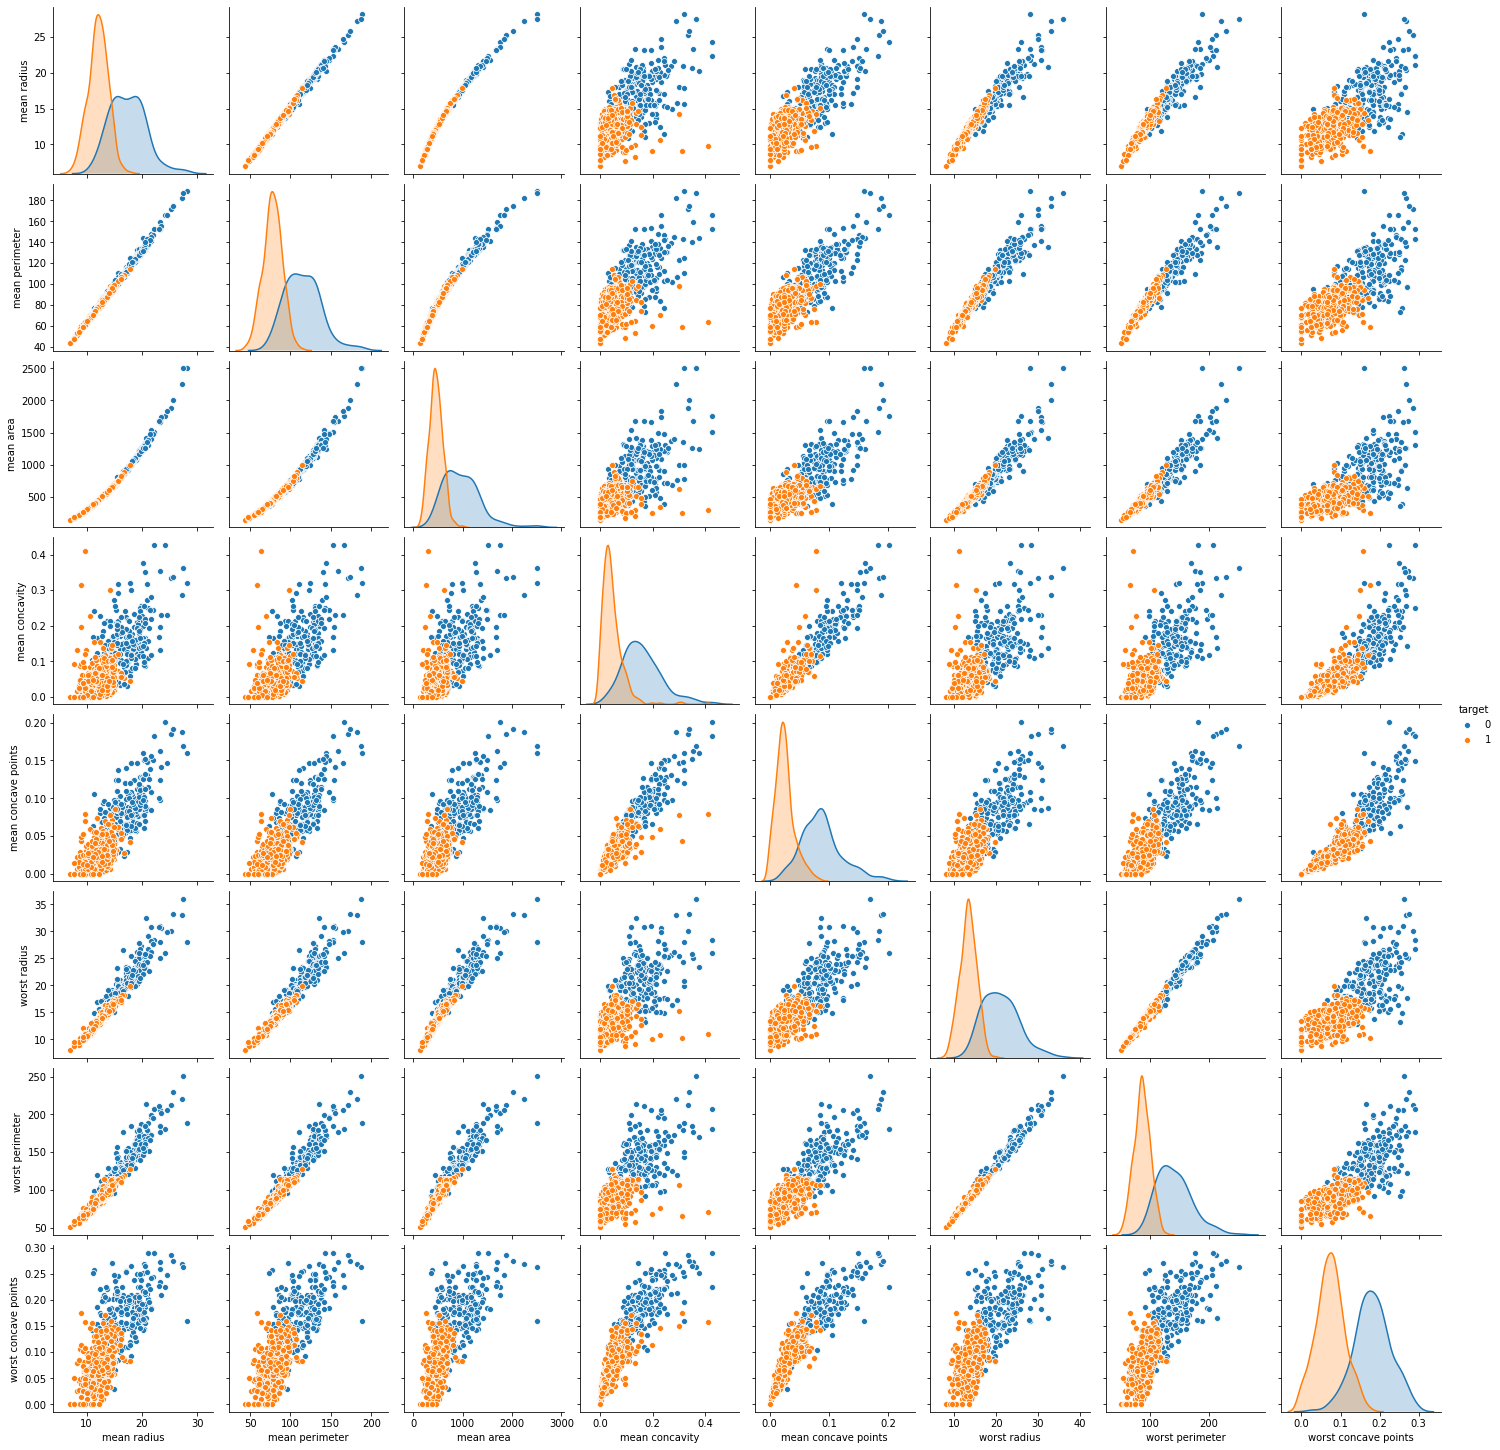

In [ ]:
sns.pairplot(df, hue = 'target', vars = ['mean radius', 'mean perimeter', 'mean area',
        'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst concave points'])

# **Creación y entrenamiento de modelo de tipo SVC** (Support Vector Classification)

In [ ]:
x = df.drop(['target'], axis=1)  # carga características a variable/dimensión/eje x
y = df['target']  # carga target a variable/dimensión/eje y

In [ ]:
# dividimos el set de datos en subconjuntos de entrenamiento y test (75/25)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# crea modelo de tipo SVC, referencia: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svc_model = SVC()

# entrena modelo con datos de entrenamiento
svc_model.fit(X_train, y_train)

# Obtiene resultados del modelo
svc_model.score(X_train, y_train)

0.903755868544601

In [ ]:
y_train

293    1
332    1
565    0
278    1
489    0
      ..
277    0
9      0
359    1
192    1
559    1
Name: target, Length: 426, dtype: int64

In [ ]:

predicciones = svc_model.predict(X_test)

print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        53
           1       0.92      0.99      0.95        90

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



In [ ]:
df2 = pd.DataFrame({'Real': y_test, 'Predecido': svc_model.predict(X_test).flatten()})
df2

,Real,Predecido
512,0,1
457,1,1
439,1,1
298,1,1
37,1,1
...,...,...
236,0,0
113,1,1
527,1,1
76,1,1


# **Actividad**

_Obligatorio_
- Realiza un cálculo del error del modelo (considerando más de 1 técnica)
- Propone soluciones de cómo optimizar el modelo
- ¿Cuándo crees que el modelo podría llegar a tener problemas en la clasificación correcta de nuevas observaciones? (textual)

_Opcional_

- Aplica un modelo de regresión lineal a este set de datos (incluida etapa de análisis y exploración)
- ¿Hay diferencias en la precisión del modelo? ¿A qué crees que se deban estas diferencias?
